# In this assignment we learn about numerical stabiity of the covariance matrix, fitting $\chi^2$ distributions, to correct for the Hartlap factor.

## For this assignment no external packages are required. You just need a running conda environment, where numpy and matplotlib are installed.

In [14]:
## Imports the necessary libraries 

import matplotlib.pyplot as plt
import random
import numpy as np
from numpy.linalg import inv
from scipy.special import gamma, factorial
from scipy.optimize import curve_fit
from scipy.stats import chi2 as chi2_scp

## Preparation: load in the data we need for this assignment.

In [15]:
# Loads-in the reference model
model = np.load("reference_model.npy") # This path is specific to my current working directory 
# Loads-in the analytical covariance matrix
cov = np.load("covariance.npy")

## Task 1: Create two sets of 10000 noisy Gaussian data vectors each using the provided reference model and true covariance matrix. 

In [16]:
# Draws samples from a multivariate Gaussian distribution 
noisy_data_set1 = np.random.multivariate_normal(model, cov, size = 10000) # Note: "model" provides the means 
noisy_data_set2 = np.random.multivariate_normal(model, cov, size = 10000)

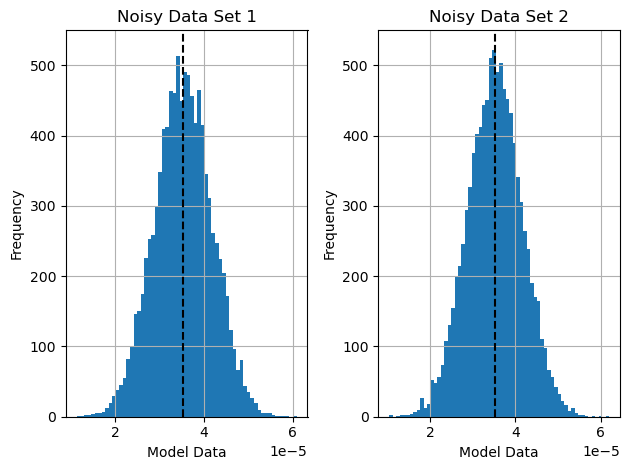

In [17]:
## Plots sample histograms using the first columns from the data sets 

titles = ["Noisy Data Set 1", "Noisy Data Set 2"]
data_sets = [noisy_data_set1, noisy_data_set2]

fig, ax = plt.subplots(nrows = 1, ncols = 2)

for data, title, num in zip(data_sets, titles, range(2)):
    ax[num].set_title(title, fontsize = 12)
    ax[num].hist(data[:, 0], bins = "fd")
    # Plots the theoretical average as a vertical line on the histogram 
    ax[num].vlines(model[0], 0, 600, color = "k", linestyle = "--")
    ax[num].set_xlabel("Model Data", fontsize = 10)
    ax[num].set_ylabel("Frequency", fontsize = 10)
    ax[num].set_ylim(0, 550)
    ax[num].grid()

# Ensures that the axis labels do not overlap 
plt.tight_layout()
plt.show()

The histograms above should be made for all 900 columns in the noisy data sets to ensure they scatter around the truth. For simplicity, one histogram per noisy data set was made. 

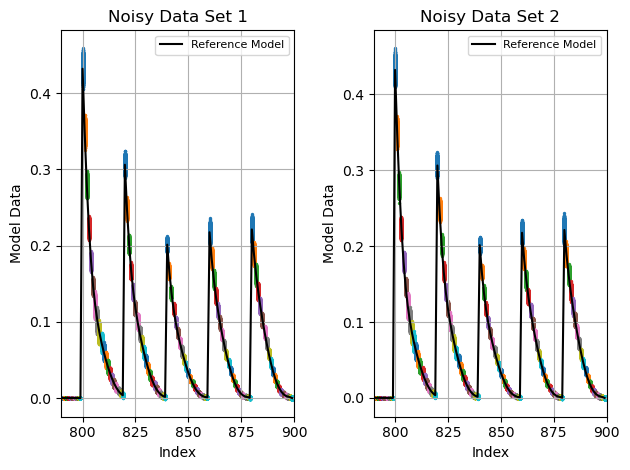

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

for data, title, num in zip(data_sets, titles, range(2)):
    ax[num].set_title(title, fontsize = 12)
    
    for i in range(len(model)): 
        # Defines an array of indices the size of a data set 
        x_vals = np.ones(len(data)) * i 
        # Plots the scattered data at that index 
        ax[num].scatter(x_vals, data[:, i], s = 2)    
    
    # Overlays the "truth" or the reference model 
    ax[num].plot(range(len(model)), model, color = "k", label = "Reference Model")
    ax[num].set_xlabel("Index", fontsize = 10)
    ax[num].set_ylabel("Model Data", fontsize = 10)
    # Restricts the range on the x-axis to better see the scatter around the truth 
    ax[num].set_xlim(790, 900)
    ax[num].legend(loc = "best", fontsize = 8)
    ax[num].grid()

plt.tight_layout()
plt.show()

As can be seen in the plots above, the noisy data sets (colorful scatter plots) scatter around the truth (black line). For each index of the model data vector, the random, noisy points at that index were plotted. 

## Task 2: 
#### Use the provided covariance matrix and the model as a reference.
### 2.1: Test if set 1 follows a $\chi^2$ distribution with the correct degrees of freedom, by measuring its mean and variance. 
### 2.2: Convince yourself, that the measured $\chi^2$ follows a $\chi^2$ distribution.

Experimental Mean: 899.8911562144137
Experimental Variance: 1799.83793040223
----------------------------------------------------------------------------------------------------
Theoretical Mean: 899.0
Theoretical Variance: 1798.0


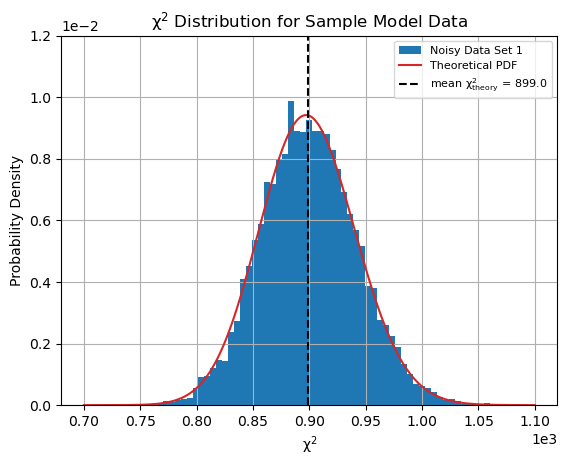

In [19]:
chi2 = []
# Computes the degrees of freedom 
df = len(model) - 1
# Computes the inverse of the covariance matrix 
cov_i = inv(cov)

def chi_squared(model_vector, data_vector, inv_cov):
    """
    This function computes the chi-squared statistic given a model vector, a data vector, and an inverse covariance matrix.
    """
    
    vector = model_vector - data_vector 
    # Computes the matrix product of two arrays 
    return np.matmul(np.transpose(vector), np.matmul(inv_cov, vector))

for i in range(len(noisy_data_set1)):
    # Computes the chi-squared statistic for all the rows in set 1 
    chi2.append(chi_squared(model, noisy_data_set1[i, :], cov_i))
    
print("Experimental Mean:", np.mean(chi2))
print("Experimental Variance:", np.var(chi2))
print("--" * 50)

# Computes the theoretical mean and variance solely using the degrees of freedom 
mean, var = chi2_scp.stats(df, moments = "mv")
print("Theoretical Mean:", mean)
print("Theoretical Variance:", var)

x_data = np.linspace(700, 1100, num = 10000, endpoint = True)

plt.title(r"$\mathrm{\chi^2}$" + " Distribution for Sample Model Data", fontsize = 12)
# Uses scientific notation for both axis labels 
plt.ticklabel_format(axis = "both", style = "sci", scilimits = (0, 0))
# Plots a histogram of chi-squared values 
plt.hist(chi2, bins = "fd", density = True, color = "tab:blue", label = "Noisy Data Set 1")
# Plots the theoretical chi-squared distribution 
plt.plot(x_data, chi2_scp.pdf(x_data, df), color = "tab:red", label = "Theoretical PDF")
# Plots the mean chi-squared value as a vertical line 
plt.vlines(mean, 0, 0.012, label = "mean " + r"$\mathrm{\chi_{theory}^{2}}\,=\,$" + str(mean), linestyle = "--", 
           color = "k")
plt.xlabel(r"$\mathrm{\chi^2}$", fontsize = 10)
plt.ylabel("Probability Density", fontsize = 10)
plt.ylim(0, 0.012)
plt.legend(loc = "best", fontsize = 8)
plt.grid()
plt.show()

The experimental and theoretical means and variances are very close. Also, the theoretical probability density function, which solely comes from the degrees of freedom, traces out the histogram quite well. Thus, set 1 follows a chi-squared distribution. Since the two noisy data sets were created in the same way, set 2 should also follow a chi-squared distribution. 

### After convincing us that the two sets actually follow a $\chi^2$ distribution, if we use the analytical covariance matrix, we want to check if that is also true if we measure the covariance matrix from simulations. 
### As running simulations is too expensive, we simulate measurements from simulations with the created set 2. 
### Task 3: As a preparation, please measure the numerical covariance matrix from [500,1000,5000,10000] data vectors from set 2. What do you observe in the correlation matrix? Are the covariances positive semi-definite?

In [20]:
## Measures numerical covariance matrices from set 2 

cov_num500 = np.cov(np.transpose(noisy_data_set2[:500, :]))
cov_num1000 = np.cov(np.transpose(noisy_data_set2[:1000, :]))
cov_num5000 = np.cov(np.transpose(noisy_data_set2[:5000, :]))
cov_num10000 = np.cov(np.transpose(noisy_data_set2[:10000, :]))

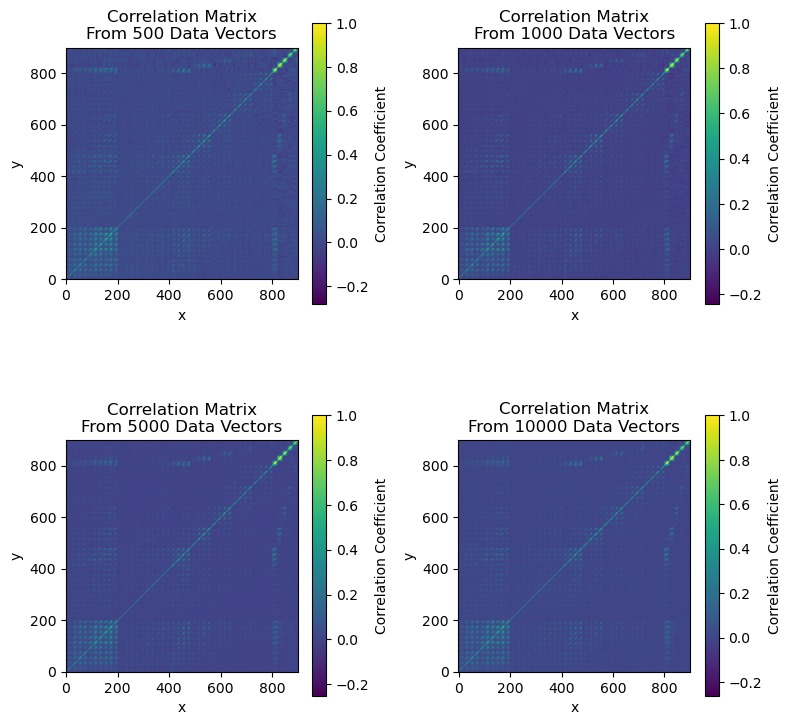

In [21]:
n_vectors = ["500", "1000", "5000", "10000"]
slices = [[0, 0], [0, 1], [1, 0], [1, 1]]
cov_data = [cov_num500, cov_num1000, cov_num5000, cov_num10000]

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8))

for data, num_1, num_2 in zip(cov_data, n_vectors, range(4)): 
    # Sets the title of each subplot 
    ax[slices[num_2][0], slices[num_2][1]].set_title("Correlation Matrix\nFrom " + num_1 + " Data Vectors", fontsize = 12)
    # Computes and plots the correlation matrix for a given covariance matrix 
    im = ax[slices[num_2][0], slices[num_2][1]].imshow(data / np.sqrt(np.outer(np.diag(data), np.diag(data))), 
                                                       origin = "lower")
    ax[slices[num_2][0], slices[num_2][1]].set_xlabel("x", fontsize = 10)
    ax[slices[num_2][0], slices[num_2][1]].set_ylabel("y", fontsize = 10)
    fig.colorbar(im, orientation = "vertical", shrink = 0.8, label = "Correlation Coefficient")

plt.tight_layout()
plt.show()

In [22]:
def eigvals_checker(bool_arr):
    """
    This function checks if there are any negative eigenvalues in a covariance matrix, given a boolean array. Note: a 
    "false" indicates a negative eigenvalue. 
    """
    
    for i in bool_arr:
        
        if i == False:
            print("Negative eigenvalue(s) found.")
            # Terminates the for loop after a negative eigenvalue is found 
            break
            
    print("No negative eigenvalues found.")

## Computes the eigenvalues/eigenvectors for each covariance matrix     
    
eigvals_500, eigvectors_500 = np.linalg.eig(cov_num500)
eigvals_1000, eigvectors_1000 = np.linalg.eig(cov_num1000)
eigvals_5000, eigvectors_5000 = np.linalg.eig(cov_num5000)
eigvals_10000, eigvectors_10000 = np.linalg.eig(cov_num10000)

zeros = np.zeros(eigvals_500.shape)

## Constructs boolean arrays for each array of eigenvalues 

bools_500 = eigvals_500 >= zeros
bools_1000 = eigvals_1000 >= zeros
bools_5000 = eigvals_5000 >= zeros
bools_10000 = eigvals_10000 >= zeros

## Checks whether a covariance matrix has negative eigenvalues 

eigvals_checker(bools_500)
eigvals_checker(bools_1000)
eigvals_checker(bools_5000)
eigvals_checker(bools_10000)

print("")
print(eigvals_500)

Negative eigenvalue(s) found.
No negative eigenvalues found.
No negative eigenvalues found.
No negative eigenvalues found.
No negative eigenvalues found.

[ 1.31732361e-04+0.00000000e+00j  7.87470004e-05+0.00000000e+00j
  5.54703886e-05+0.00000000e+00j  4.84566837e-05+0.00000000e+00j
  3.94556071e-05+0.00000000e+00j  3.10742151e-05+0.00000000e+00j
  2.17934190e-05+0.00000000e+00j  1.87676337e-05+0.00000000e+00j
  1.44007947e-05+0.00000000e+00j  1.39240222e-05+0.00000000e+00j
  1.37475850e-05+0.00000000e+00j  1.13301058e-05+0.00000000e+00j
  9.85788980e-06+0.00000000e+00j  8.81477938e-06+0.00000000e+00j
  8.61132636e-06+0.00000000e+00j  7.69754998e-06+0.00000000e+00j
  6.50325635e-06+0.00000000e+00j  5.98487645e-06+0.00000000e+00j
  5.53000247e-06+0.00000000e+00j  5.18139867e-06+0.00000000e+00j
  4.99912819e-06+0.00000000e+00j  4.40685467e-06+0.00000000e+00j
  4.11815116e-06+0.00000000e+00j  3.74898354e-06+0.00000000e+00j
  3.60358333e-06+0.00000000e+00j  3.39413980e-06+0.00000000e+00j


The diagonal elements have a value of 1, which makes sense according to the formula for the correlation matrix. The matrix is also symmetric. To check whether the covariance matrices are positive semi-definite, we can see if their eigenvalues are greater than or equal to zero. Negative eigenvalues were found in the covariance matrix from 500 data vectors, whereas negative eigenvalues were not found in the other matrices. Also, when printing out the eigenvalues for the matrix from 500 data vectors, you can see that some eigenvalues are imaginary. Therefore, the covariance matrix from 500 data vectors is NOT positive semi-definite, whereas the other covariance matrices are. 

### Task 4: Test for all four covariance matrices if you recover a $\chi^2$ distribution with the mean and variance. What do you observe? 

RESULTS USING NOISY DATA SET 1:

Experimental Mean Using the Covariance Matrix From 500 Data Vectors: 1.629205938459394e+16
Experimental Variance Using the Covariance Matrix From 500 Data Vectors: 3.529785909663831e+34
----------------------------------------------------------------------------------------------------
Experimental Mean Using the Covariance Matrix From 1000 Data Vectors: 9117.953084906718
Experimental Variance Using the Covariance Matrix From 1000 Data Vectors: 1797964.314026213
----------------------------------------------------------------------------------------------------
Experimental Mean Using the Covariance Matrix From 5000 Data Vectors: 1095.9552897533122
Experimental Variance Using the Covariance Matrix From 5000 Data Vectors: 3204.0441557183103
----------------------------------------------------------------------------------------------------
Experimental Mean Using the Covariance Matrix From 10000 Data Vectors: 988.0897865816618
Experimental Variance Using

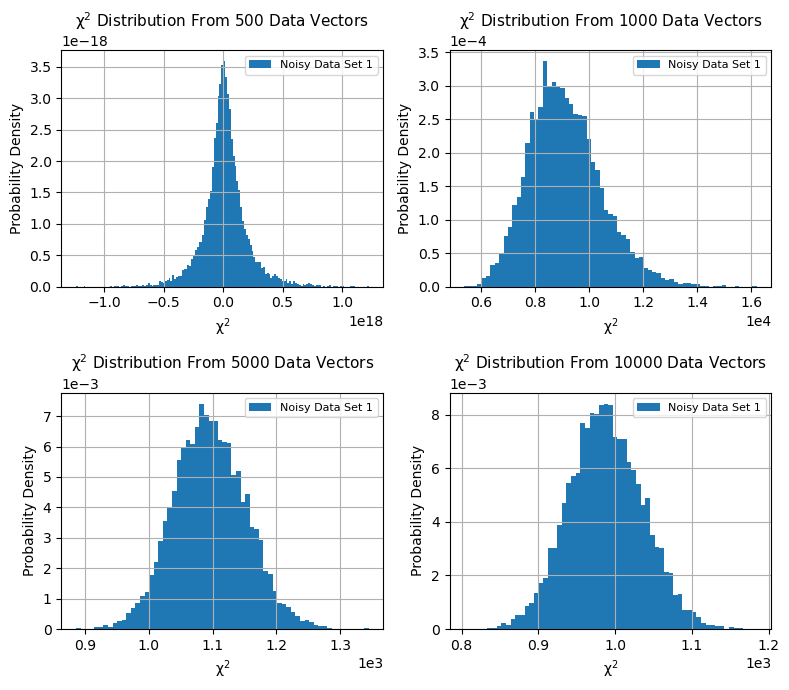

In [23]:
chi2_500 = []
chi2_1000 = []
chi2_5000 = []
chi2_10000 = []

chi_lists = [chi2_500, chi2_1000, chi2_5000, chi2_10000]

for data, arr in zip(cov_data, chi_lists): 
    cov_i = inv(data)
    for i in range(len(noisy_data_set1)):
        # Computes the chi-squared statistic for all the rows in set 1 using a numerical covariance matrix 
        arr.append(chi_squared(model, noisy_data_set1[i, :], cov_i))

print("RESULTS USING NOISY DATA SET 1:")
print("")
print("Experimental Mean Using the Covariance Matrix From 500 Data Vectors:", np.mean(chi2_500))
print("Experimental Variance Using the Covariance Matrix From 500 Data Vectors:", np.var(chi2_500))
print("--" * 50)
print("Experimental Mean Using the Covariance Matrix From 1000 Data Vectors:", np.mean(chi2_1000))
print("Experimental Variance Using the Covariance Matrix From 1000 Data Vectors:", np.var(chi2_1000))
print("--" * 50)
print("Experimental Mean Using the Covariance Matrix From 5000 Data Vectors:", np.mean(chi2_5000))
print("Experimental Variance Using the Covariance Matrix From 5000 Data Vectors:", np.var(chi2_5000))
print("--" * 50)
print("Experimental Mean Using the Covariance Matrix From 10000 Data Vectors:", np.mean(chi2_10000))
print("Experimental Variance Using the Covariance Matrix From 10000 Data Vectors:", np.var(chi2_10000))

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 7)) 

for chi_vals, num_1, num_2 in zip(chi_lists, n_vectors, range(4)): 
    ax[slices[num_2][0], slices[num_2][1]].set_title(r"$\mathrm{\chi^2}$" + " Distribution From " + num_1 + 
                                                     " Data Vectors", fontsize = 11)
    ax[slices[num_2][0], slices[num_2][1]].ticklabel_format(axis = "both", style = "sci", scilimits = (0, 0))
    # Plots histograms of the chi-squared values for each covariance matrix 
    ax[slices[num_2][0], slices[num_2][1]].hist(chi_vals, bins = "fd", density = True, label = "Noisy Data Set 1")
    ax[slices[num_2][0], slices[num_2][1]].set_xlabel(r"$\mathrm{\chi^2}$", fontsize = 10)
    ax[slices[num_2][0], slices[num_2][1]].set_ylabel("Probability Density", fontsize = 10)
    ax[slices[num_2][0], slices[num_2][1]].legend(loc = "best", fontsize = 8)
    ax[slices[num_2][0], slices[num_2][1]].grid()

plt.tight_layout()
plt.show()

Recall: The theoretical mean was 899 and the theoretical variance was 1798. The experimental means and variances above are very off, and seem to heavily depend on the number of data vectors. It seems like using more data vectors leads to means and variances that are closer to the theoretical ones. Therefore, with covariance matrices from data vectors from Noisy Data Set 2, a chi-squared distribution cannot be recovered. 

<br>

Additional remarks: The chi-squared distribution from 500 data vectors is "weirder" than the other distributions throughout these exercises. This is because the covariance matrix has negative eigenvalues, meaning the matrix is not invertible. To ensure the covariance matrix is invertible, the number of realisations used must be greater than or equal to the rank of the matrix. Here, the rank is 900, but the number of realisations is 500, so the covariance matrix ended up having negative eigenvalues. 

### Task 5: Repeat the same exercise from before, but debias your inverse covriance matrix with the so-called Hartlap factor. What do you observe?

RESULTS USING NOISY DATA SET 1:

Debiased Experimental Mean Using the Covariance Matrix From 500 Data Vectors: -1.3125065876967464e+16
Debiased Experimental Variance Using the Covariance Matrix From 500 Data Vectors: 2.290864382654341e+34
----------------------------------------------------------------------------------------------------
Debiased Experimental Mean Using the Covariance Matrix From 1000 Data Vectors: 894.4538561770354
Debiased Experimental Variance Using the Covariance Matrix From 1000 Data Vectors: 17302.236442556423
----------------------------------------------------------------------------------------------------
Debiased Experimental Mean Using the Covariance Matrix From 5000 Data Vectors: 898.4246404098965
Debiased Experimental Variance Using the Covariance Matrix From 5000 Data Vectors: 2153.159127510545
----------------------------------------------------------------------------------------------------
Debiased Experimental Mean Using the Covariance Matrix From 1

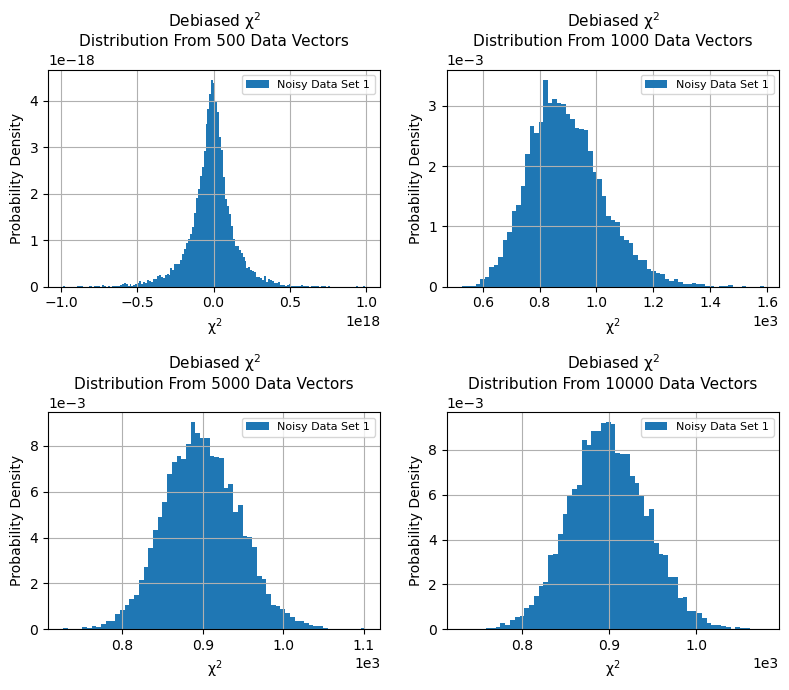

In [24]:
## Computes the Hartlap factor for each covariance matrix 

h_500 = (500 - 1) / (500 - len(model) - 2)
h_1000 = (1000 - 1) / (1000 - len(model) - 2)
h_5000 = (5000 - 1) / (5000 - len(model) - 2)
h_10000 = (10000 - 1) / (10000 - len(model) - 2)

h_facts = [h_500, h_1000, h_5000, h_10000]

## Copies the previous cell of code but includes the Hartlap factor 

deb_chi2_500 = []
deb_chi2_1000 = []
deb_chi2_5000 = []
deb_chi2_10000 = []

deb_chi_lists = [deb_chi2_500, deb_chi2_1000, deb_chi2_5000, deb_chi2_10000]

for data, arr, h in zip(cov_data, deb_chi_lists, h_facts): 
    deb_cov_i = inv(data) / h
    for i in range(len(noisy_data_set1)):
        arr.append(chi_squared(model, noisy_data_set1[i, :], deb_cov_i))

print("RESULTS USING NOISY DATA SET 1:")
print("")
print("Debiased Experimental Mean Using the Covariance Matrix From 500 Data Vectors:", np.mean(deb_chi2_500))
print("Debiased Experimental Variance Using the Covariance Matrix From 500 Data Vectors:", np.var(deb_chi2_500))
print("--" * 50)
print("Debiased Experimental Mean Using the Covariance Matrix From 1000 Data Vectors:", np.mean(deb_chi2_1000))
print("Debiased Experimental Variance Using the Covariance Matrix From 1000 Data Vectors:", np.var(deb_chi2_1000))
print("--" * 50)
print("Debiased Experimental Mean Using the Covariance Matrix From 5000 Data Vectors:", np.mean(deb_chi2_5000))
print("Debiased Experimental Variance Using the Covariance Matrix From 5000 Data Vectors:", np.var(deb_chi2_5000))
print("--" * 50)
print("Debiased Experimental Mean Using the Covariance Matrix From 10000 Data Vectors:", np.mean(deb_chi2_10000))
print("Debiased Experimental Variance Using the Covariance Matrix From 10000 Data Vectors:", np.var(deb_chi2_10000))

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 7)) 

for chi_vals, num_1, num_2 in zip(deb_chi_lists, n_vectors, range(4)): 
    ax[slices[num_2][0], slices[num_2][1]].set_title("Debiased " + r"$\mathrm{\chi^2}$" + "\nDistribution From " + num_1 + 
                                                     " Data Vectors", fontsize = 11)
    ax[slices[num_2][0], slices[num_2][1]].ticklabel_format(axis = "both", style = "sci", scilimits = (0, 0))
    ax[slices[num_2][0], slices[num_2][1]].hist(chi_vals, bins = "fd", density = True, label = "Noisy Data Set 1")
    ax[slices[num_2][0], slices[num_2][1]].set_xlabel(r"$\mathrm{\chi^2}$", fontsize = 10)
    ax[slices[num_2][0], slices[num_2][1]].set_ylabel("Probability Density", fontsize = 10)
    ax[slices[num_2][0], slices[num_2][1]].legend(loc = "best", fontsize = 8)
    ax[slices[num_2][0], slices[num_2][1]].grid()

plt.tight_layout()
plt.show()

By including the Hartlap factor, the experimental means seem to be much closer to the theoretical mean (899), except for the chi-squared distribution from 500 data vectors. However, the experimental variances are not close to the theoretical variance (1798). It seems like incorporating the Hartlap factor can bring us very close to the true mean, but it cannot account for all the noise in the covariance matrix. Thus, a chi-squared distribution can be recovered by debiasing the inverse covariance matrix with the Hartlap factor and using a sufficient number of data vectors (~5000 +). If more data vectors are used, then the variance should continue to decrease as well. 

### Task 6: Repeat task 5 again, but this time, test if set 2 also follows a $\chi^2$ distribution. What do you observe?

RESULTS USING NOISY DATA SET 2:

Debiased Experimental Mean Using the Covariance Matrix From 500 Data Vectors: -1.0825575102109408e+16
Debiased Experimental Variance Using the Covariance Matrix From 500 Data Vectors: 2.1258883885982215e+34
----------------------------------------------------------------------------------------------------
Debiased Experimental Mean Using the Covariance Matrix From 1000 Data Vectors: 811.2769700392818
Debiased Experimental Variance Using the Covariance Matrix From 1000 Data Vectors: 73926.31102561443
----------------------------------------------------------------------------------------------------
Debiased Experimental Mean Using the Covariance Matrix From 5000 Data Vectors: 818.2228680649395
Debiased Experimental Variance Using the Covariance Matrix From 5000 Data Vectors: 8030.448309247431
----------------------------------------------------------------------------------------------------
Debiased Experimental Mean Using the Covariance Matrix From 1

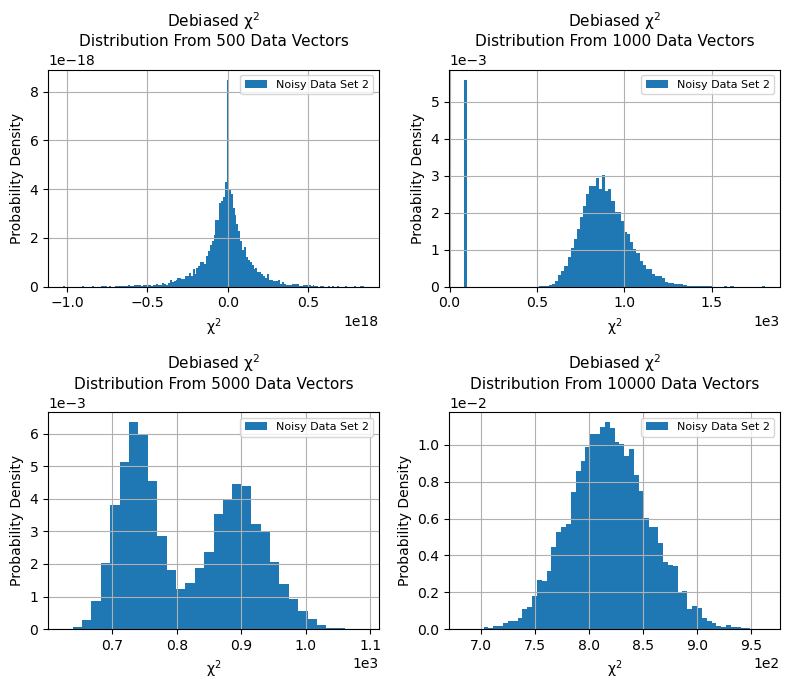

In [25]:
## Copies the previous 2 cells of code but uses set 2 when computing chi-squared values

deb_chi2_500_ = []
deb_chi2_1000_ = []
deb_chi2_5000_ = []
deb_chi2_10000_ = []

deb_chi_lists_ = [deb_chi2_500_, deb_chi2_1000_, deb_chi2_5000_, deb_chi2_10000_]

for data, arr, h in zip(cov_data, deb_chi_lists_, h_facts): 
    deb_cov_i = inv(data) / h
    for i in range(len(noisy_data_set2)):
        arr.append(chi_squared(model, noisy_data_set2[i, :], deb_cov_i))

print("RESULTS USING NOISY DATA SET 2:")
print("")
print("Debiased Experimental Mean Using the Covariance Matrix From 500 Data Vectors:", np.mean(deb_chi2_500_))
print("Debiased Experimental Variance Using the Covariance Matrix From 500 Data Vectors:", np.var(deb_chi2_500_))
print("--" * 50)
print("Debiased Experimental Mean Using the Covariance Matrix From 1000 Data Vectors:", np.mean(deb_chi2_1000_))
print("Debiased Experimental Variance Using the Covariance Matrix From 1000 Data Vectors:", np.var(deb_chi2_1000_))
print("--" * 50)
print("Debiased Experimental Mean Using the Covariance Matrix From 5000 Data Vectors:", np.mean(deb_chi2_5000_))
print("Debiased Experimental Variance Using the Covariance Matrix From 5000 Data Vectors:", np.var(deb_chi2_5000_))
print("--" * 50)
print("Debiased Experimental Mean Using the Covariance Matrix From 10000 Data Vectors:", np.mean(deb_chi2_10000_))
print("Debiased Experimental Variance Using the Covariance Matrix From 10000 Data Vectors:", np.var(deb_chi2_10000_))

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 7)) 

for chi_vals, num_1, num_2 in zip(deb_chi_lists_, n_vectors, range(4)): 
    ax[slices[num_2][0], slices[num_2][1]].set_title("Debiased " + r"$\mathrm{\chi^2}$" + "\nDistribution From " + num_1 + 
                                                     " Data Vectors", fontsize = 11)
    ax[slices[num_2][0], slices[num_2][1]].ticklabel_format(axis = "both", style = "sci", scilimits = (0, 0))
    ax[slices[num_2][0], slices[num_2][1]].hist(chi_vals, bins = "fd", density = True, label = "Noisy Data Set 2")
    ax[slices[num_2][0], slices[num_2][1]].set_xlabel(r"$\mathrm{\chi^2}$", fontsize = 10)
    ax[slices[num_2][0], slices[num_2][1]].set_ylabel("Probability Density", fontsize = 10)
    ax[slices[num_2][0], slices[num_2][1]].legend(loc = "best", fontsize = 8)
    ax[slices[num_2][0], slices[num_2][1]].grid()

plt.tight_layout()
plt.show()

By using Noisy Data Set 2, we see that the experimental means are underestimated compared to the theoretical mean (899). Also, the variances are quite off from the theoretical variance (1798), with some being significantly greater than the theoretical value, and some being lower. Additionally, the chi-squared distributions from 1000 and 5000 data vectors do not have a singular peak, with the distribution from 5000 data vectors being bimodal. Therefore, a chi-squared distribution cannot be recovered. 

### Bonus Task 1: Create a new set of 10000 noisy data vectors using the numerical covariance matrix measured from 1000 noisy data vectors. Is it possible to reduce the noise in the covariance matrix with this method? Test if set 1 follows a $\chi^2$ distribution which the newly created covaraince matrix. What do you observe?

Experimental mean: 894.4830403993741
Experimental variance: 17480.193692258355


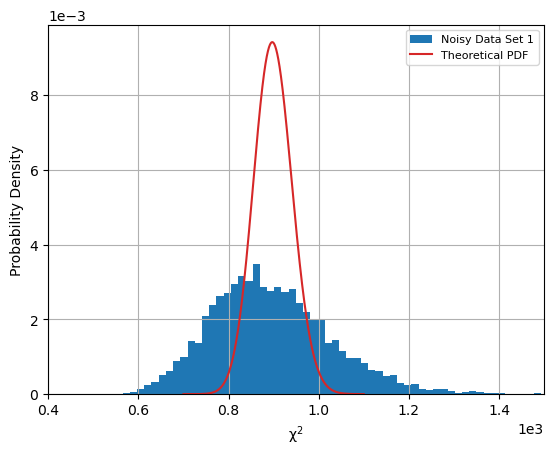

In [29]:
# Creates a new set of noisy data vectors using a debiased numerical covariance matrix 
noisy_data_set3 = np.random.multivariate_normal(model, cov_num1000 * h_1000, size = 10000)
cov_num10000_set3 = np.cov(np.transpose(noisy_data_set3))
# Debiases the new inverse covariance matrix  
deb_cov_i_set3 = inv(cov_num10000_set3) / h_10000

deb_chi2 = []

for i in range(len(noisy_data_set1)):
    # Computes the chi-squared statistic for all the rows in set 1 using the debiased numerical covariance matrix from set 3
    deb_chi2.append(chi_squared(model, noisy_data_set1[i, :], deb_cov_i_set3))
    
print("Experimental mean:", np.mean(deb_chi2))
print("Experimental variance:", np.var(deb_chi2))
    
plt.ticklabel_format(axis = "both", style = "sci", scilimits = (0, 0))
plt.hist(deb_chi2, bins = "fd", density = True, color = "tab:blue", label = "Noisy Data Set 1")
plt.plot(x_data, chi2_scp.pdf(x_data, df), color = "tab:red", label = "Theoretical PDF")
plt.xlabel(r"$\mathrm{\chi^2}$", fontsize = 10)
plt.ylabel("Probability Density", fontsize = 10)
plt.xlim(0.4e3, 1.5e3)
plt.legend(loc = "best", fontsize = 8)
plt.grid()
plt.show()

When both covariance matrices were debiased with the Hartlap factor (cov_num1000 and deb_cov_i_set3), the experimental mean was pretty close to the theoretical mean (899). However, the experimental variance was still significantly larger than the theoretical variance (1798). It makes sense that the variance is large since data vectors were drawn from an already noisy covariance matrix, and those vectors were then used to create another numerical covariance matrix. Thus, it is NOT possible to reduce the noise in the covariance matrix with this method. Also, since both the experimental mean and variance are off from their theoretical values, a chi-squared distribution cannot be recovered. 

### Bonus task 2: What is the minimum number of data vectors such that the inverse covariance matrix is non-singular? What is an easy tool to test this? Is an analytical covariance matrix always invertible? What can you do if it is not invertible? 

The minimum number of data vectors such that the inverse covariance matrix is non-singular depends on the rank of the covariance matrix. As previously mentioned, the number of realisations should be greater than or equal to the rank of the matrix. So, here, the minimum number of data vectors/realisations would be 900. 

<br>

To test whether an inverse covariance matrix is non-singular, you can simply compute the determinant of the covariance matrix and ensure it's nonzero. 

<br>

No, an analytical covariance matrix is not guaranteed to be invertible. If a covariance matrix is not invertible, you can remove the negative eigenvalues/eigenvectors and use a slightly different formula to compute the chi-squared statistic. 